In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# dimension, n, avgDeg, alpha, ple, threads, seed, plot, TimeWeights, TimePositions, TimeBinary, TimeEdges, GenNumEdge, GenAvgDeg
data = pd.read_csv("soap4.log")

# base
# d = 1;
# n = 1<<15; // = 32768
# alpha = std::numeric_limits<double>::infinity();
# alpha_binomial = 2.0;
# ple = 2.5;
# deg=10;
# threads = 1;

In [19]:
def plot(plot_data, attribute, semilog=True, title_suffix=""):
    frame = plot_data.groupby(attribute)

    fig, [ax, ax2] = plt.subplots(1,2,figsize=(16,6))
    xs = frame[attribute].first()
    edges = frame["n"].first() * frame["avgDeg"].first() / 2

    if title_suffix:
        ax.set_title("growing " + attribute + " (" + title_suffix + ")")
    else: 
        ax.set_title("growing " + attribute)
    ax.set_ylabel("time per edge in ns")
    ax.set_xlabel(attribute)
    if semilog:
        ax.semilogx()
    for key in data.keys():
        if not 'Time' in key:
            continue
        ys = frame[key].mean() / edges * 10**6
        #yerr = plot_data[key].std() 
        ax.plot(xs, ys, '.-', label=key)
        #ax.errorbar(xs, ys, yerr, label=str(key)+" "+str(deg))
    ax.legend()

    ax2.set_title("Desired / Generated Edges")
    ax2.set_ylabel("ratio")
    ax2.set_xlabel(attribute)
    if semilog:
        ax2.semilogx()
    ys = frame["GenNumEdge"].mean() / edges
    ax2.plot(xs,ys, label="edges generated")

    plt.show()
    
    
def plot_scaling(plot_data, title="strong scaling"):
    frame = plot_data.groupby("threads")
    xs = frame["threads"].first()
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title(title)
    ax.set_ylabel("Strong Scaling Efficiency in %")
    ax.set_xlabel("threads")
    
    y_real = frame["TimeEdges"].mean()
    t1 = y_real[1]
    ax.plot(xs, t1 / y_real, '.-', label="TimeEdges")
    ax.plot(xs, [1]*len(xs), '.-', label="NoScaling")
    ax.plot(xs, xs, '.-', label="PerfectScaling")
        
    plt.legend()
    plt.show()

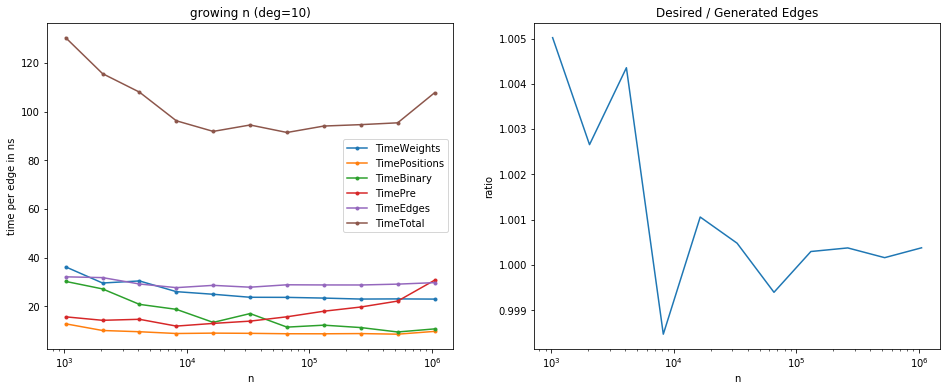

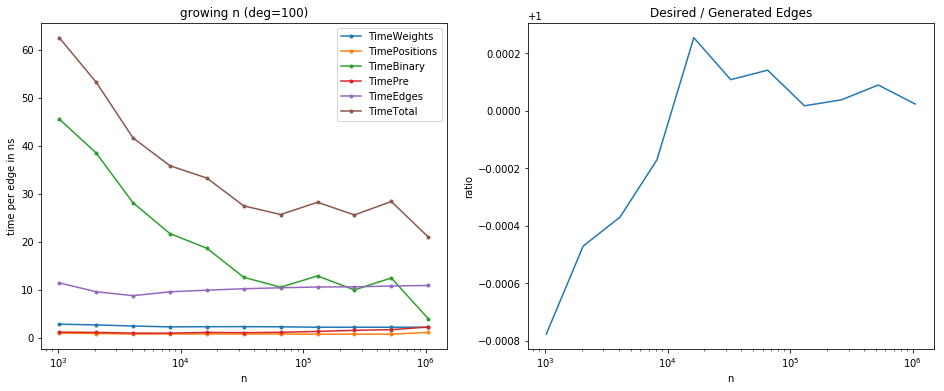

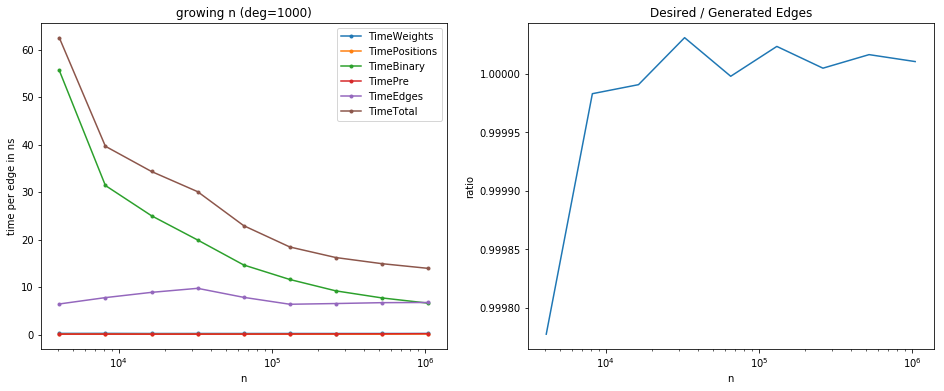

In [20]:
# plot 0: growing n
plot_data = data[data["plot"]==0].groupby(['avgDeg'])
for deg, deg_frame in plot_data:
    plot(deg_frame, "n", title_suffix="deg="+str(deg))

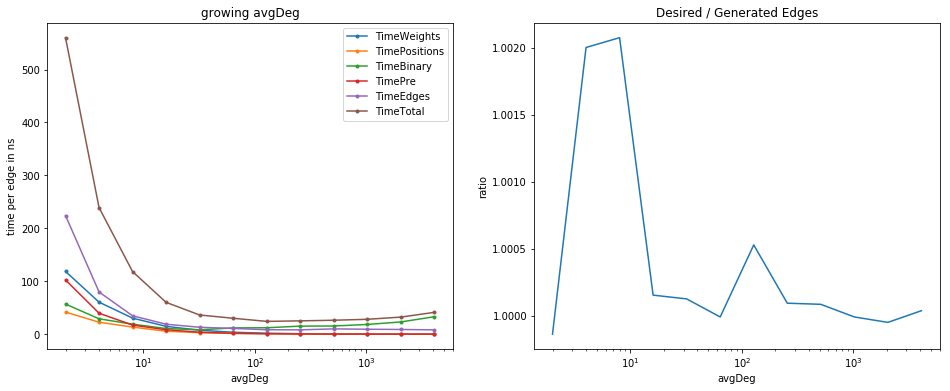

In [21]:
# plot 1: growing deg
plot(data[data["plot"]==1], "avgDeg")

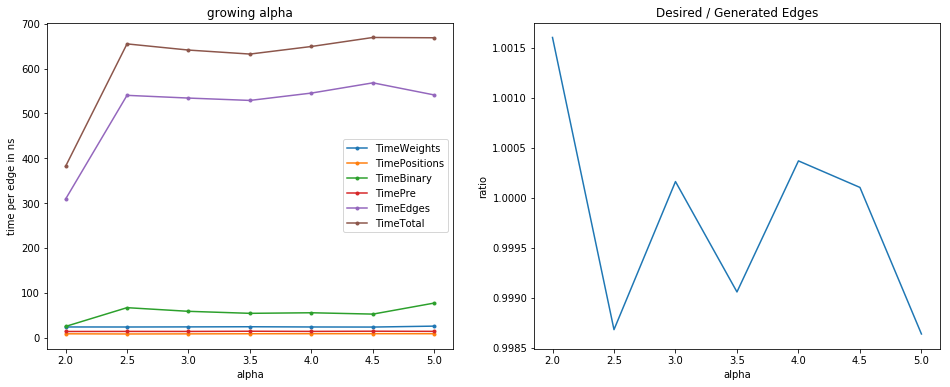

In [22]:
# plot 2: growing alpha
plot(data[data["plot"]==2], "alpha", semilog=False)

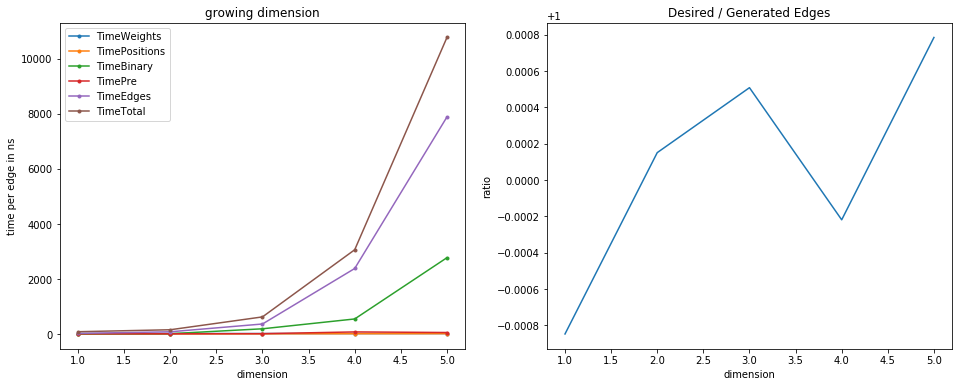

In [23]:
# plot 3: growing dimension
plot(data[data["plot"]==3], "dimension", semilog=False)

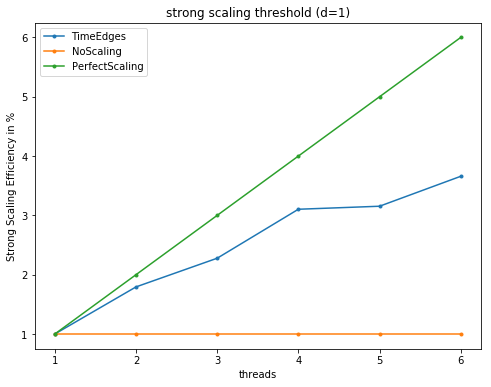

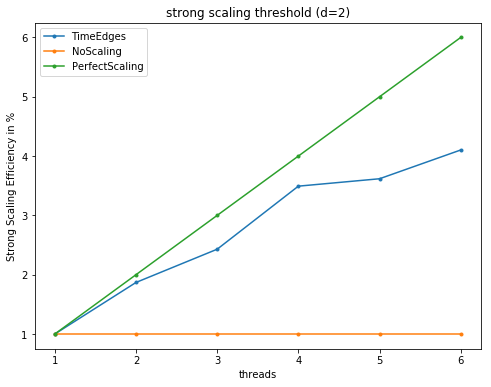

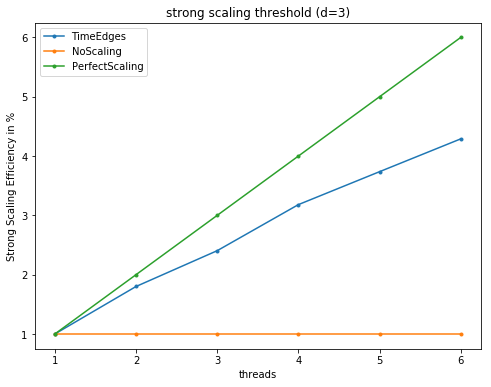

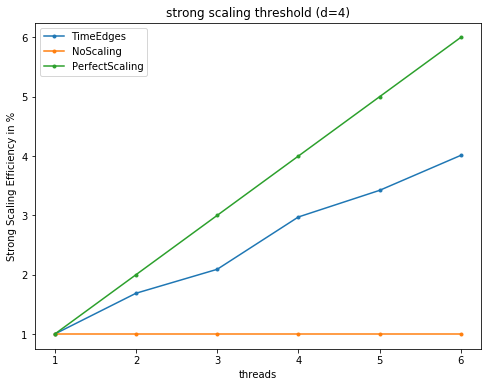

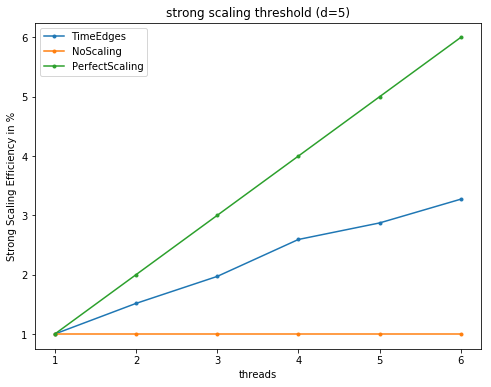

In [24]:
# plot 4: strong scaling threshold
plot_data = data[data["plot"]==4].groupby(['dimension'])
for dim, dim_frame in plot_data:
    plot_scaling(dim_frame, "strong scaling threshold (d="+str(dim)+")")

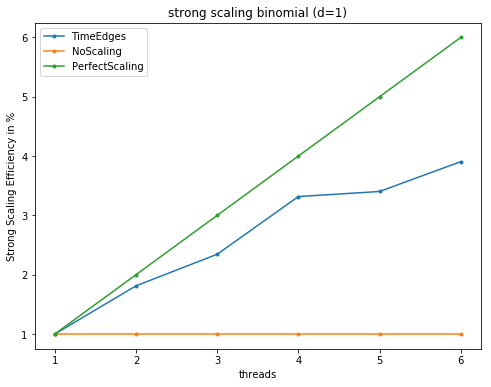

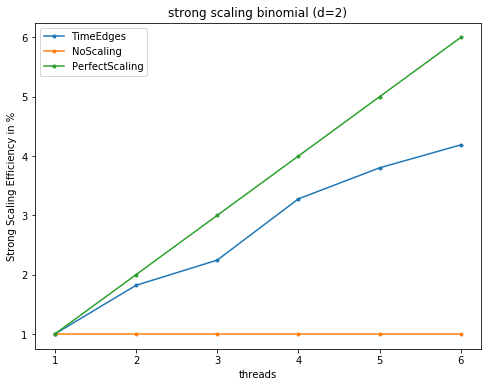

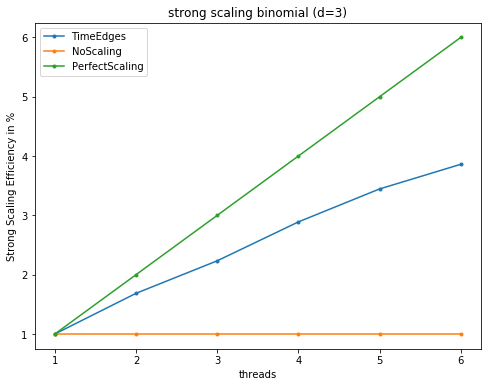

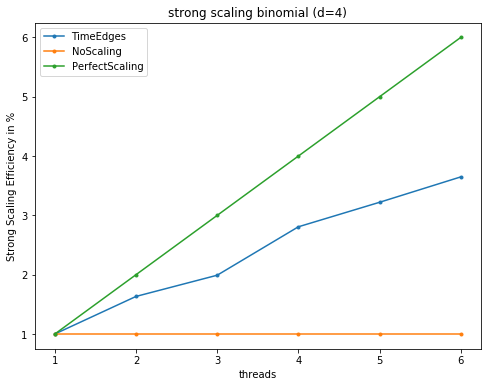

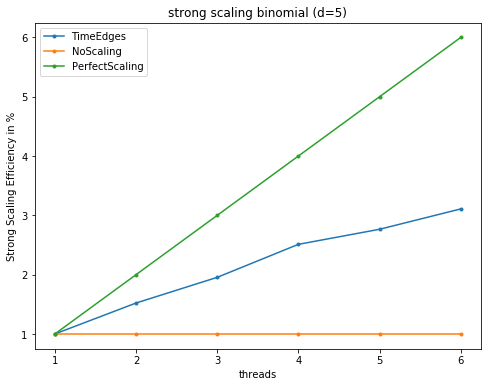

In [25]:
# plot 5: strong scaling binomial
plot_data = data[data["plot"]==5].groupby(['dimension'])
for dim, dim_frame in plot_data:
    plot_scaling(dim_frame, "strong scaling binomial (d="+str(dim)+")")